## **Linear Regression with Python**

### **Problem**
Predicting the percentage of marks that a student is expected to score based upon the number of hours they studied.

```Input: No. of Hours```

```Output: Predicted Score```

## Importing required libraries



In [ ]:
# Install libraries if required
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Plotting the data points on a 2-D graph for visualization

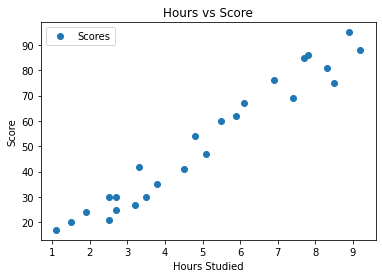

In [3]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

From the graph above, it is evident that there is a **_positive linear relation_** between the no. of hours studied and the score.

## Preparing the data

Separate the features and labels

In [4]:
x = np.array(dataset['Hours']).reshape(-1, 1)
y = np.array(dataset['Scores']).reshape(-1, 1)

Splitting the dataset into training and test sets

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0) 

## Training the Linear Regression model

Fit a linear regressor to the training dataset

In [6]:
from sklearn.linear_model import LinearRegression  
linear_regressor = LinearRegression()  
linear_regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualizing the regression line with the data points

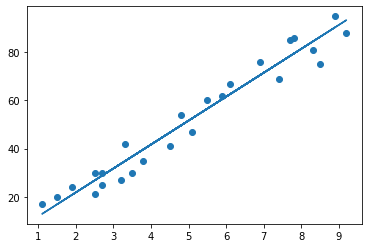

In [7]:
line = linear_regressor.coef_ * x + linear_regressor.intercept_

plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Testing the Linear Regression model

Make predictions with the test set to evaluate the model performance

In [8]:
y_pred = linear_regressor.predict(x_test)

Visualizing the regression line with the test data points

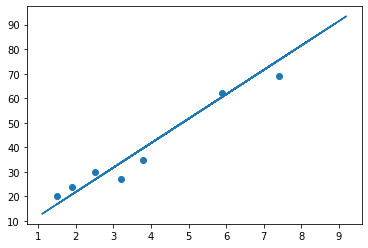

In [9]:
line = linear_regressor.coef_ * x + linear_regressor.intercept_

plt.scatter(x_test, y_test)
plt.plot(x, line);
plt.show()

Visualizing the errors

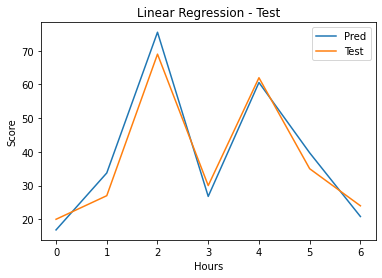

In [10]:
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(('Pred', 'Test'))
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Linear Regression - Test')
plt.show()

Comparing actual and predicted values

In [11]:
pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Evaluating the model

In [12]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test, y_pred))
temp = y_pred - y_test

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score : ", r2)
adj_r2 = 1 - (1-r2)*(len(x_test) - 1) / (len(x_test) - x_test.shape[1] - 1)
print("Adjusted R2 Score : ", adj_r2)

MAE: 4.130879918502482
R2 Score :  0.9367661043365056
Adjusted R2 Score :  0.9241193252038068


## Training the Support Vector Regression model with a linear kernel

Fit an SVR model to the training dataset

In [13]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'linear')
svr_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Visualizing the regression line with the training data points

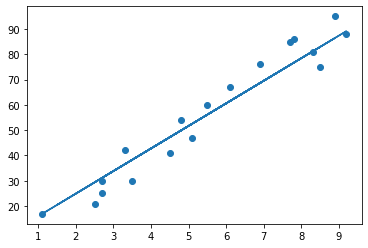

In [14]:
line = svr_regressor.coef_ * x + svr_regressor.intercept_

plt.scatter(x_train, y_train)
plt.plot(x, line);
plt.show()

## Testing the Support Vector Regression model with a linear kernel

Make predictions with the test set to evaluate the model performance

In [15]:
y_pred = svr_regressor.predict(x_test)

Visualizing the regression line with the test data points

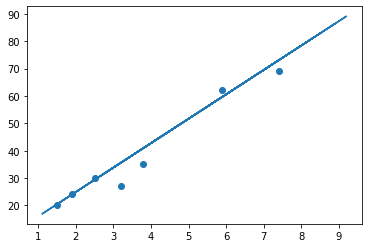

In [16]:
line = svr_regressor.coef_ * x + svr_regressor.intercept_

plt.scatter(x_test, y_test)
plt.plot(x, line);
plt.show()

Visualizing the errors

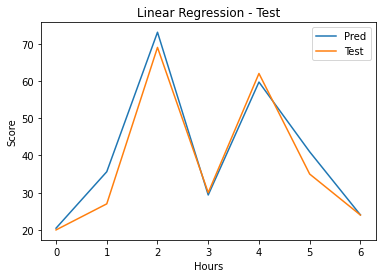

In [17]:
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(('Pred', 'Test'))
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Linear Regression - Test')
plt.show()

Comparing actual and predicted values

In [18]:
pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

,Actual,Predicted
0,20,20.466666
1,27,35.624999
2,69,73.074999
3,30,29.383333
4,62,59.699999
5,35,40.974999
6,24,24.033333


## Evaluating the model

In [19]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test, y_pred))
temp = y_pred - y_test

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score : ", r2)
adj_r2 = 1 - (1-r2)*(len(x_test) - 1) / (len(x_test) - x_test.shape[1] - 1)
print("Adjusted R2 Score : ", adj_r2)

MAE: 3.155952123569407
R2 Score :  0.9410953186822326
Adjusted R2 Score :  0.9293143824186791


## What will be the predicted score if the student studies for 9.25 hours/day ?

In [23]:
hours = 9.25
pred_score = linear_regressor.predict(np.array(hours).reshape(-1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0][0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652
